In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_score, recall_score

In [2]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\villain\OneDrive\Desktop\Data analytics\data mining\project ideas\creditCusChurn.csv')
# removing the above columns as they are not required in the file
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [3]:
print("-----------Information-----------")
print(df.info())


-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              1

In [4]:
numerical = [var for var in df.columns if df[var].dtype!='O'] 
categorical = [var for var in df.columns if df[var].dtype == 'O']
print("Numerical: ", numerical)
print("Caregorical: ", categorical)

Numerical:  ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Caregorical:  ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [5]:
df.select_dtypes(include='object').head() # looking at all the categorical datas present in the dataset

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# data cleaning and preprocessing

In [7]:
print("----------Missing value-----------")
print(df.isna().sum())
print("----------Null value-----------")
print(df.isnull().sum())

----------Missing value-----------
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
----------Null value-----------
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book      

In [8]:
print(df.nunique())

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64


In [9]:
# defining the columns to encode
columns_to_encode = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

# creating a LabelEncoder instance
le = LabelEncoder()

# encoding each column in the loop
for col in columns_to_encode:
    le.fit(df[col])
    df[f'{col}_encoded'] = le.transform(df[col])
    print(f'{col} unique',df[col].unique())

df.head()


Attrition_Flag unique ['Existing Customer' 'Attrited Customer']
Gender unique ['M' 'F']
Education_Level unique ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status unique ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category unique ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category unique ['Blue' 'Gold' 'Silver' 'Platinum']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_encoded,Gender_encoded,Education_Level_encoded,Marital_Status_encoded,Income_Category_encoded,Card_Category_encoded
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1144,42,1.625,0.061,1,1,3,1,2,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1291,33,3.714,0.105,1,0,2,2,4,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1887,20,2.333,0.000,1,1,2,1,3,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1171,20,2.333,0.760,1,0,3,3,4,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,816,28,2.500,0.000,1,1,5,1,2,0


In [10]:
#dropping these columns as they are not requird
df.drop(columns=['CLIENTNUM','Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'], inplace=True)#dropping as they are not required
df.describe()


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_encoded,Gender_encoded,Education_Level_encoded,Marital_Status_encoded,Income_Category_encoded,Card_Category_encoded
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.839340,0.470919,3.096574,1.463415,2.863928,0.179816
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235,0.499178,1.834812,0.737808,1.504700,0.693039
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,1.000000,0.000000,3.000000,1.000000,3.000000,0.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000,1.000000,5.000000,2.000000,4.000000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000,1.000000,6.000000,3.000000,5.000000,3.000000


In [11]:
#dropping any duplicates value if they are present in the dataset
df.drop_duplicates(inplace=True)
df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_encoded,Gender_encoded,Education_Level_encoded,Marital_Status_encoded,Income_Category_encoded,Card_Category_encoded
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1,3,1,2,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,2,2,4,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,1,2,1,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,3,3,4,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,1,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1,1,2,2,1,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,1,6,0,1,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,0,3,1,4,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0,1,2,3,1,0


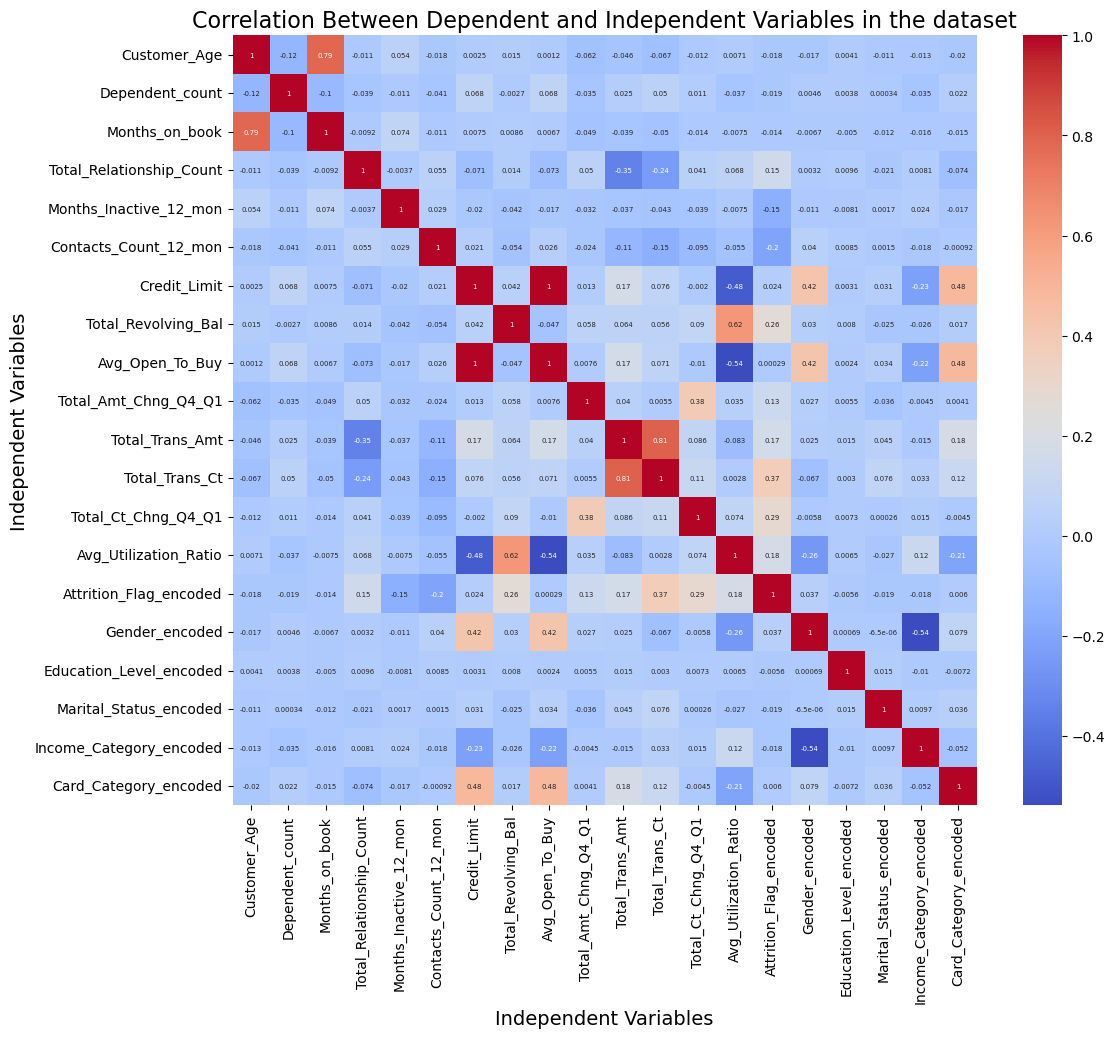

In [12]:
# Computing the correlation matrix
corr = df.corr()

# Setting the figure size
plt.figure(figsize=(12, 10))

# Creating the correlation graph
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={"size": 5})

# Adding axis labels and title
plt.xlabel('Independent Variables', fontsize=14)
plt.ylabel('Independent Variables', fontsize=14)
plt.title('Correlation Between Dependent and Independent Variables in the dataset', fontsize=16)

# Showing the plot
plt.show()

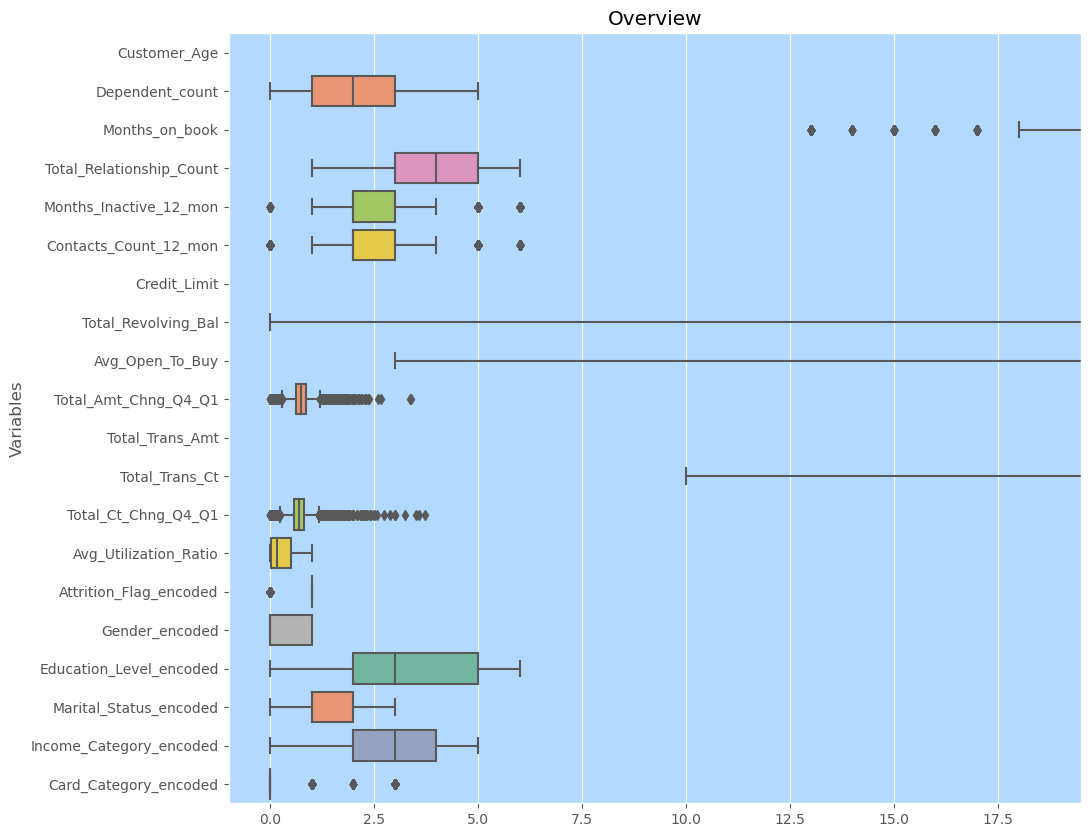

In [13]:
#creating box plot for looking at outliers
plt.style.use('ggplot') # using ggplot style

f, ax = plt.subplots(figsize=(11, 10))

ax.set_facecolor('#b3d9ff')
ax.set(xlim=(-1, len(df.columns)-0.5))
plt.ylabel('Variables')
plt.title("Overview")
ax = sns.boxplot(data = df, # creating a box plot
  orient = 'h', 
  palette = 'Set2',)

In [14]:
# removing the outliers that are present in the dataset
#removing outliers
# Calculating the first and third quartiles
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing the rows with outliers
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_encoded,Gender_encoded,Education_Level_encoded,Marital_Status_encoded,Income_Category_encoded,Card_Category_encoded
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1,3,1,2,0
5,44,2,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,1,1,2,1,1,0
9,48,2,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,1,1,2,2,3,0
10,42,5,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217,1,1,5,3,0,0
11,65,1,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174,1,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,56,1,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,1,0,2,2,4,0
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1,1,2,2,1,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,1,6,0,1,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,0,3,1,4,0


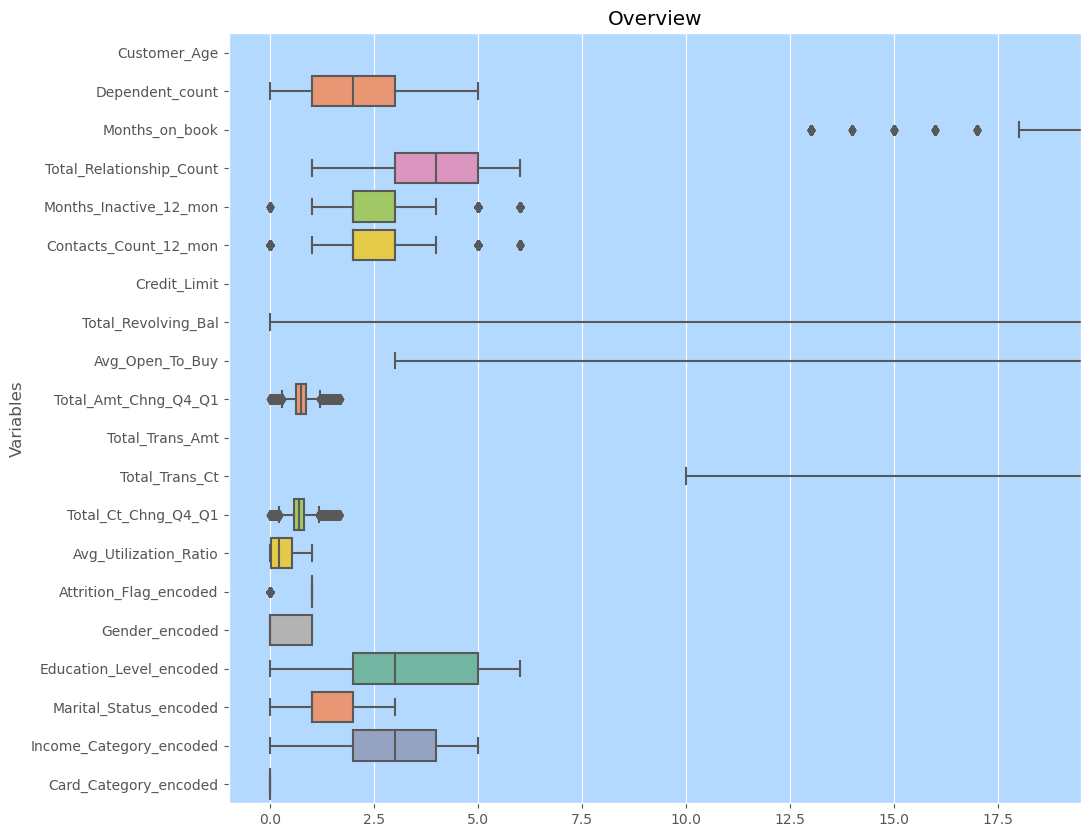

In [15]:
plt.style.use('ggplot') # using ggplot style

f, ax = plt.subplots(figsize=(11, 10))

ax.set_facecolor('#b3d9ff')
ax.set(xlim=(-1, len(df.columns)-0.5))
plt.ylabel('Variables')
plt.title("Overview")
ax = sns.boxplot(data = df, # creating a box plot
  orient = 'h', 
  palette = 'Set2',)

In [16]:
# copying the final data into a csv file for furthur use
# create a sample DataFrame
DF = pd.DataFrame(df)

# save DataFrame to CSV file
DF.to_csv('creditCardchurner.csv', index=False)


In [17]:
dff = pd.read_csv(r'C:\\Users\\villain\\OneDrive\\Desktop\\Data analytics\\data mining\\creditCardchurner.csv')
dff

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_encoded,Gender_encoded,Education_Level_encoded,Marital_Status_encoded,Income_Category_encoded,Card_Category_encoded
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1,3,1,2,0
1,44,2,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,1,1,2,1,1,0
2,48,2,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,1,1,2,2,3,0
3,42,5,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217,1,1,5,3,0,0
4,65,1,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174,1,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9345,56,1,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,1,0,2,2,4,0
9346,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1,1,2,2,1,0
9347,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,1,6,0,1,0
9348,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,0,3,1,4,0


In [18]:
true_value=dff['Attrition_Flag_encoded'].sum()
false_value= len(dff['Attrition_Flag_encoded'])-true_value
print(true_value, false_value)

7833 1517


In [19]:
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9350 entries, 0 to 9349
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              9350 non-null   int64  
 1   Dependent_count           9350 non-null   int64  
 2   Months_on_book            9350 non-null   int64  
 3   Total_Relationship_Count  9350 non-null   int64  
 4   Months_Inactive_12_mon    9350 non-null   int64  
 5   Contacts_Count_12_mon     9350 non-null   int64  
 6   Credit_Limit              9350 non-null   float64
 7   Total_Revolving_Bal       9350 non-null   int64  
 8   Avg_Open_To_Buy           9350 non-null   float64
 9   Total_Amt_Chng_Q4_Q1      9350 non-null   float64
 10  Total_Trans_Amt           9350 non-null   int64  
 11  Total_Trans_Ct            9350 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1       9350 non-null   float64
 13  Avg_Utilization_Ratio     9350 non-null   float64
 14  Attritio

In [20]:
dff.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_encoded,Gender_encoded,Education_Level_encoded,Marital_Status_encoded,Income_Category_encoded,Card_Category_encoded
count,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.0
mean,46.357968,2.335508,35.951337,3.844920,2.347059,2.457647,7351.109647,1154.064385,6197.045262,0.752339,4246.511979,64.324064,0.702951,0.290325,0.837754,0.458182,3.100963,1.457219,2.887273,0.0
std,8.058913,1.294587,8.031511,1.542673,1.015064,1.109028,7636.513291,815.691714,7654.304268,0.199807,3198.024901,22.817834,0.208505,0.278501,0.368696,0.498275,1.835481,0.735715,1.501637,0.0
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2473.000000,235.000000,1204.000000,0.628000,2148.000000,45.000000,0.579000,0.019000,1.000000,0.000000,2.000000,1.000000,2.000000,0.0
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4097.000000,1264.000000,3000.000000,0.734000,3880.000000,67.000000,0.700000,0.206000,1.000000,0.000000,3.000000,1.000000,3.000000,0.0
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,9050.750000,1776.000000,7864.500000,0.856000,4684.000000,80.000000,0.818000,0.525000,1.000000,1.000000,5.000000,2.000000,4.000000,0.0
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.689000,17995.000000,139.000000,1.684000,0.999000,1.000000,1.000000,6.000000,3.000000,5.000000,0.0


In [21]:
#from SKLEARN library
# Splitting the dataset into training and testing sets
X = dff.drop('Attrition_Flag_encoded', axis=1)
y = dff['Attrition_Flag_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.sum())
print(y_test.sum())

(6545, 19)
(2805, 19)
(6545,)
(2805,)
5494
2339


In [23]:
# Creating the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_features='sqrt')

# Fitting the classifier to the training data
rfc.fit(X_train, y_train)

# Predicting on the testing data
y_pred = rfc.predict(X_test)

# Evaluating the model's performance
accuracy_rm = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_rm)


f1 = f1_score(y_test, y_pred)
# print the F1 score
print("F1 score:", f1)
precision = precision_score(y_test, y_pred)
print("precision: ", precision)
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

Accuracy: 0.9622103386809269
F1 score: 0.9775423728813559
precision:  0.9689206215875682
recall:  0.9863189397178281


In [24]:
# creatinf a DataFrame
Creditcardcus_RF = pd.DataFrame(y_pred,columns=['CreditcardCusChurn_RFPredictions'])

# save DataFrame to CSV file
Creditcardcus_RF.to_csv('CreditcardCusChurn_RFPredictions.csv', index=False)

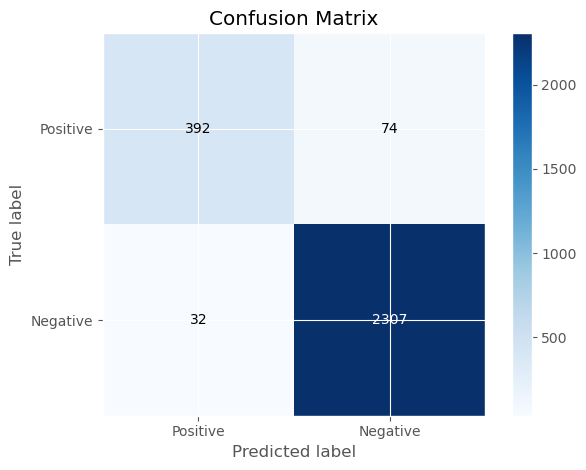

In [25]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Looping over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [26]:
np.random.seed(123)
param_grid = {'n_neighbors': range(1, 21)}
# Create the k-NN classifier and perform grid search
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Geting the best model from the grid search
best_knn_model = grid_search.best_estimator_

# Making predictions on the test set
y_predKNN = best_knn_model.predict(X_test)
# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_predKNN)
print("Accuracy: {:.2f}%".format(accuracy * 100))
f1 = f1_score(y_test, y_predKNN)
# print the F1 score
print("F1 score:", f1)
precision = precision_score(y_test, y_predKNN)
print("precision: ", precision)
recall = recall_score(y_test, y_predKNN)
print("recall: ", recall)




Accuracy: 89.23%
F1 score: 0.9361252115059222
precision:  0.9263290079531185
recall:  0.9461308251389483


In [27]:
# creating a sample DataFrame
Creditcardcus_KNN = pd.DataFrame(y_predKNN,columns=['CreditcardCusChurn_KNNPredictions'])

# save DataFrame to CSV file
Creditcardcus_KNN.to_csv('CreditcardCusChurn_KNNPredictions.csv', index=False)

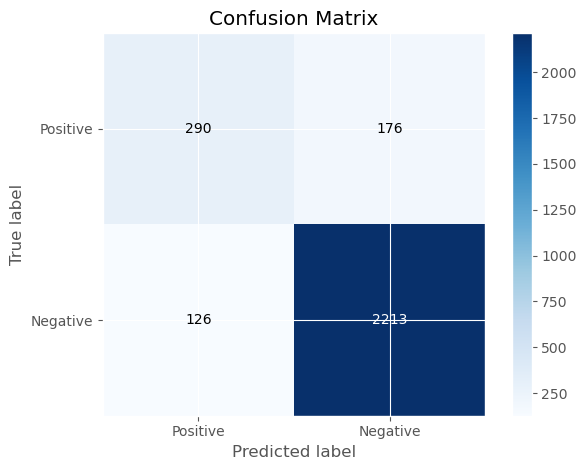

In [28]:
#Printing Confusion Matrix
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, y_predKNN)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()